### Experimenting Optimized Trajectory with Acceleration Optimization

[ 0.  -0.5]
This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1179
Number of nonzeros in inequality constraint Jacobian.:      540
Number of nonzeros in Lagrangian Hessian.............:     1080

Total number of variables............................:      276
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      189
Total number of inequality constraints...............:      540
        inequality constraints with only lower bounds:      270
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      270

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -9.3935529e-02 6.66e-01 4.42e-01  -1.0 0.00e+00    -  0.00e+

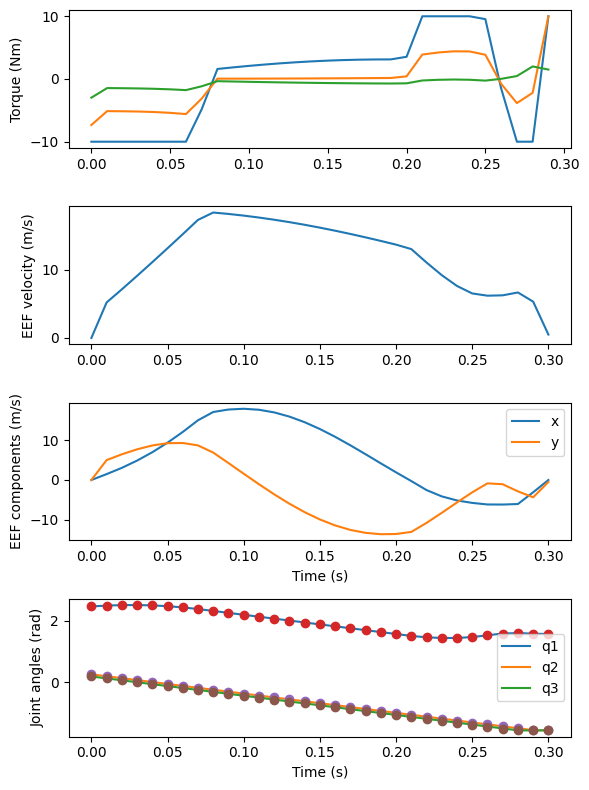

In [6]:
import numpy as np
import casadi as cs
import matplotlib.pyplot as plt
import os
import robosuite.demos.optimizing_max_jacobian as omj

# Arm parameters (example values)
m = [0.1/3, 0.1/3, 0.1/3]
l = [0.5, 0.5, 0.5]
r = [l[0]/20, l[1]/20, l[2]/20]

# Desired end-effector velocity (2D)
v_f = np.array([0.0, -0.5])
# optimize for only magnitude of velocity
# v_ee_mag_des = 11.0

# Initial conditions
q_f = np.array([np.pi*0.5, -np.pi*0.5, -np.pi*0.5])


# Bounds
q_lower = -4/5*np.pi * np.ones(3)
q_upper = 4/5*np.pi * np.ones(3)
dq_lower = -2*np.pi * np.ones(3)
dq_upper = 2*np.pi * np.ones(3)
tau_lower = -10*np.ones(3)
tau_upper = 10*np.ones(3)

# Time horizon and discretization steps
T = 0.3  # seconds
N = 30

print(v_f)
# Optimize the trajectory
solution = omj.optimize_trajectory_cartesian_accel(q_f, v_f, m, l, r,
                        q_lower, q_upper, dq_lower, dq_upper,
                        tau_lower, tau_upper,
                        T, N,
                        weight_v=1e-2, weight_xdd=1e-3,
                        weight_tau_smooth = 1e-3, weight_terminal = 1e-1)
omj.display_and_save_solution(solution, 'opt_trajectory_max_cartesian_accel.npy')




### Experimenting Time Optimal Trajectory with Acceleration Optimization

[ 0.  -0.5]
This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1359
Number of nonzeros in inequality constraint Jacobian.:      542
Number of nonzeros in Lagrangian Hessian.............:     1350

Total number of variables............................:      277
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      189
Total number of inequality constraints...............:      542
        inequality constraints with only lower bounds:      271
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      271

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -2.8720312e-02 6.66e-01 3.30e-01  -1.0 0.00e+00    -  0.00e+

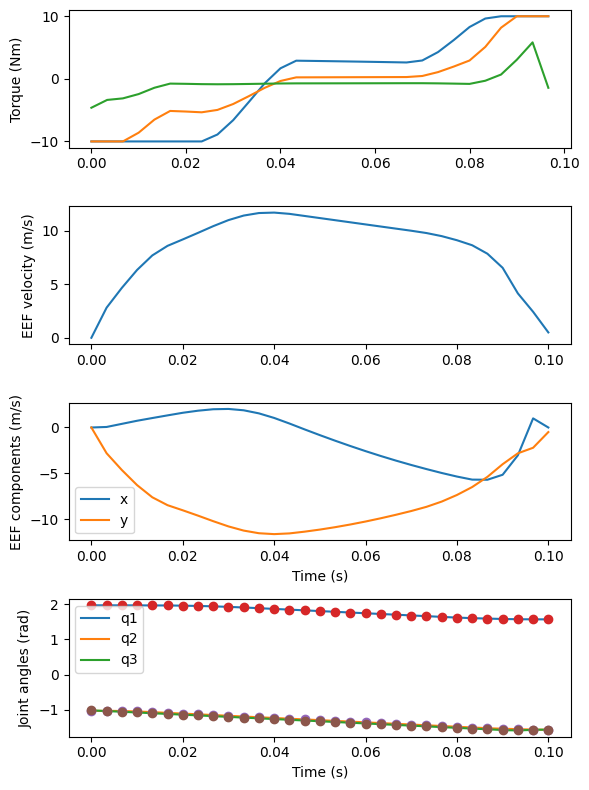

In [ ]:
import numpy as np
import casadi as cs
import matplotlib.pyplot as plt
import os
import robosuite.demos.optimizing_max_jacobian as omj

# Arm parameters (example values)
m = [0.1/3, 0.1/3, 0.1/3]
l = [0.5, 0.5, 0.5]
r = [l[0]/20, l[1]/20, l[2]/20]

# Desired end-effector velocity (2D)
v_f = np.array([0.0, -0.5])
# optimize for only magnitude of velocity
# v_ee_mag_des = 11.0

# Initial conditions
q_f = np.array([np.pi*0.5, -np.pi*0.5, -np.pi*0.5])


# Bounds
q_lower = -4/5*np.pi * np.ones(3)
q_upper = 4/5*np.pi * np.ones(3)
dq_lower = -2*np.pi * np.ones(3)
dq_upper = 2*np.pi * np.ones(3)
tau_lower = -10*np.ones(3)
tau_upper = 10*np.ones(3)
t_lower = 0.1
t_upper = 0.5
t_init = 0.5

t_lower = 0.5
t_upper = 2.0
t_init = 1.0

# Time horizon and discretization steps
N = 30

print(v_f)
# Optimize the trajectory
solution = omj.time_optimal_trajectory_cartesian_accel(q_f, v_f, m, l, r,
                        q_lower, q_upper, dq_lower, dq_upper,
                        tau_lower, tau_upper, 
                        t_lower, t_upper,t_init,
                        N)
omj.display_and_save_solution(solution, 'time_opt_trajectory_max_cartesian_accel.npy')


